In [1]:
import serial
import matplotlib.pyplot as plt

#Collecting data from serial port and convert to list of decimal integers

arduinoSerialData = serial.Serial('com3',9600)
count = 0
ListData = []

while (count<100):
    ListData.append(arduinoSerialData.readline())
    count += 1

arduinoSerialData.close()

print(ListData)

[b'22\r\n', b'51\r\n', b'37\r\n', b'18\r\n', b'16\r\n', b'47\r\n', b'44\r\n', b'22\r\n', b'23\r\n', b'23\r\n', b'21\r\n', b'21\r\n', b'62\r\n', b'37\r\n', b'23\r\n', b'22\r\n', b'50\r\n', b'32\r\n', b'22\r\n', b'24\r\n', b'44\r\n', b'33\r\n', b'19\r\n', b'49\r\n', b'23\r\n', b'22\r\n', b'29\r\n', b'49\r\n', b'27\r\n', b'17\r\n', b'16\r\n', b'25\r\n', b'22\r\n', b'51\r\n', b'37\r\n', b'18\r\n', b'16\r\n', b'47\r\n', b'44\r\n', b'22\r\n', b'23\r\n', b'23\r\n', b'21\r\n', b'21\r\n', b'62\r\n', b'25\r\n', b'44\r\n', b'36\r\n', b'22\r\n', b'51\r\n', b'24\r\n', b'21\r\n', b'24\r\n', b'42\r\n', b'21\r\n', b'22\r\n', b'20\r\n', b'24\r\n', b'22\r\n', b'39\r\n', b'43\r\n', b'21\r\n', b'20\r\n', b'42\r\n', b'40\r\n', b'22\r\n', b'20\r\n', b'25\r\n', b'24\r\n', b'46\r\n', b'39\r\n', b'34\r\n', b'25\r\n', b'27\r\n', b'41\r\n', b'30\r\n', b'33\r\n', b'30\r\n', b'25\r\n', b'26\r\n', b'27\r\n', b'50\r\n', b'27\r\n', b'26\r\n', b'24\r\n', b'42\r\n', b'27\r\n', b'23\r\n', b'21\r\n', b'40\r\n', b'28\r\n'

In [2]:
#ListData = StringData.split()
CleanData = []
ErrorIndices = []
for i in range(len(ListData)):
    CleanData.append(int(ListData[i].decode('utf-8')))
    #if (isinstance(ListData[i], str) == True):
    #    ListData[i] = decode(ListData[i])
    #else:
    #    ErrorIndices.append(i)

print(CleanData)

[22, 51, 37, 18, 16, 47, 44, 22, 23, 23, 21, 21, 62, 37, 23, 22, 50, 32, 22, 24, 44, 33, 19, 49, 23, 22, 29, 49, 27, 17, 16, 25, 22, 51, 37, 18, 16, 47, 44, 22, 23, 23, 21, 21, 62, 25, 44, 36, 22, 51, 24, 21, 24, 42, 21, 22, 20, 24, 22, 39, 43, 21, 20, 42, 40, 22, 20, 25, 24, 46, 39, 34, 25, 27, 41, 30, 33, 30, 25, 26, 27, 50, 27, 26, 24, 42, 27, 23, 21, 40, 28, 52, 41, 19, 20, 50, 42, 34, 37, 32]


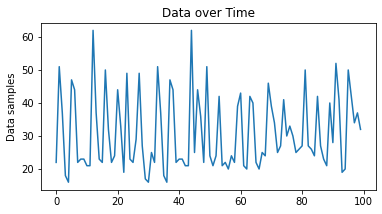

In [3]:
#Creating plot from data
    
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.clear()
ax.plot(range(len(CleanData)), CleanData)
plt.subplots_adjust(bottom=0.30)
plt.title('Data over Time')
plt.ylabel('Data samples')
plt.show()